# IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Visualization 
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


# Taks .. Basic binary classification

In [ ]:
# Tweet positive == 0 , negative==1

In [2]:
# Load the data
tweets_df = pd.read_csv('twitter.csv')

In [3]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets_df.info()
# we didn't have any missed Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,31962.0,15981.500000,9226.778988,1.0,7991.25,15981.5,23971.75,31962.0
label,31962.0,0.070146,0.255397,0.0,0.00,0.0,0.00,1.0


In [6]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

- Drop the 'id' column from the DataFrame. 


In [7]:
tweets_df = tweets_df.drop(['id'], axis = 1)


In [8]:
tweets_df # Already dropped column

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# EXPLORE DATASET

In [10]:
# Checking Null
tweets_df.isnull().sum()

label    0
tweet    0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

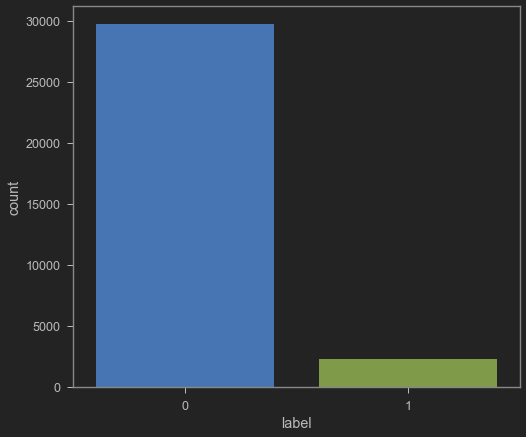

In [16]:
# distribution for labels 
sns.countplot(x = tweets_df['label'], label = "count")

# it seems that we have unbalanced data

In [17]:
# Add length as a feature Column
tweets_df['length'] = tweets_df['tweet'].apply(len) # -apply function to all rows in this column 

In [18]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

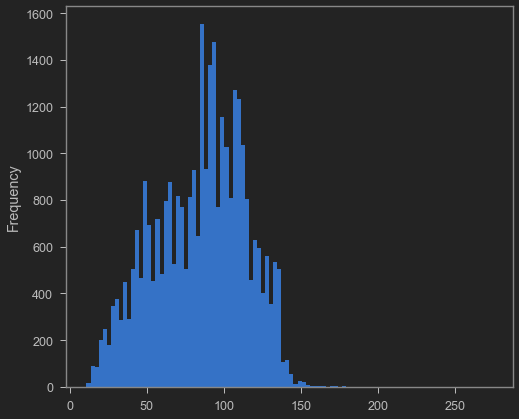

In [19]:
# see the distribution of length 
tweets_df['length'].plot(bins=100, kind='hist') 

# average tweets between 80-100 characters  

In [21]:
tweets_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.0,0.0,0.0,1.0
length,31962.0,84.739628,29.455749,11.0,63.0,88.0,108.0,274.0


In [23]:
tweets_df[tweets_df['length'] == 11] # minimum sentence in the database 

,label,tweet,length
25195,0,i love you,11


MINI CHALLENGE #3
- View the message with the average length

In [24]:
tweets_df[tweets_df['length']==84] # average sentence n the database

,label,tweet,length
43,0,my mom shares the same bihday as @user bihda...,84
220,0,g o a l s ð repost from @user #propey #ocea...,84
640,0,oscar tabarez talks luis suarezâs angry reac...,84
723,0,@user another hands &amp; feet complete!! ber...,84
742,0,because great things never came from comfo zon...,84
...,...,...,...
31445,0,.@user on making choices to keep herself as ...,84
31448,0,i'm a gordo. #passpo #florence #firenze #italy...,84
31509,0,just 3 keys that are found on your computer to...,84
31857,0,traveling happy #family holidays #car #sunny...,84


In [25]:
# Make positive data fram
positive = tweets_df[tweets_df['label']==0]

In [29]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [30]:
# make negative data frame
negative = tweets_df[tweets_df['label']==1]

In [31]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# PLOT THE WORDCLOUD

In [34]:
sentences = tweets_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [35]:
sentences[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [37]:
len(sentences) # i have 31962 sentence 

31962

In [40]:
sentences_as_one_string = " ".join(sentences) 


In [42]:
!pip install WordCloud
from wordcloud import WordCloud



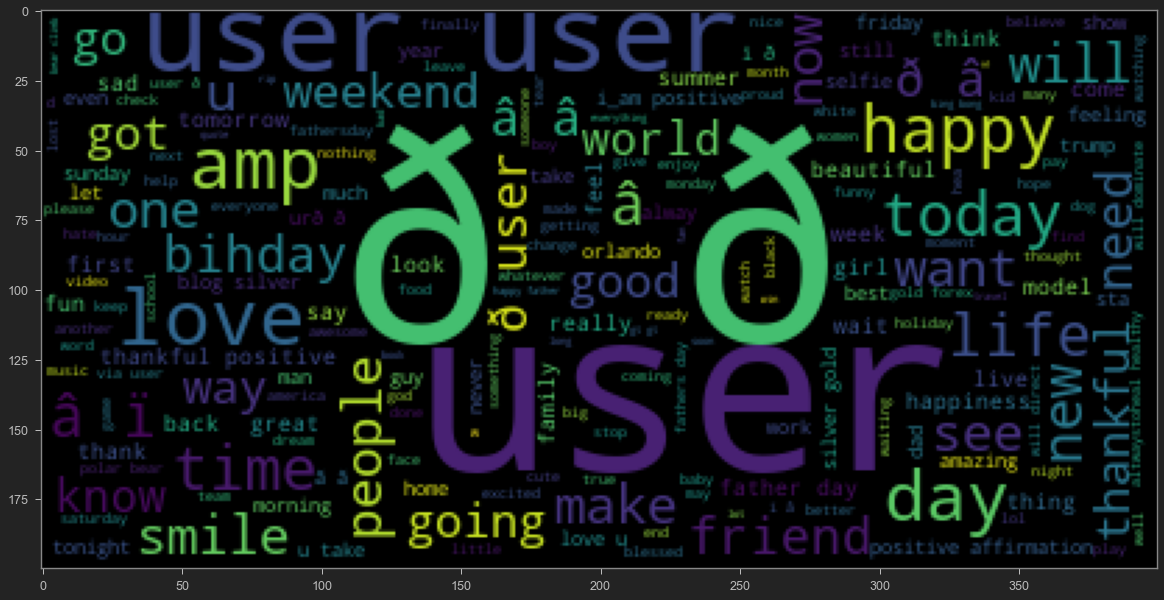

In [43]:
# Visual Representation for all text that we have 
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string)) # positive and negative words 


- Plot the wordcloud of the "negative" dataframe. 


In [47]:
negative_sentences = negative['tweet'].tolist()

negative_sentence_as_one_string = " ".join(negative_sentences)

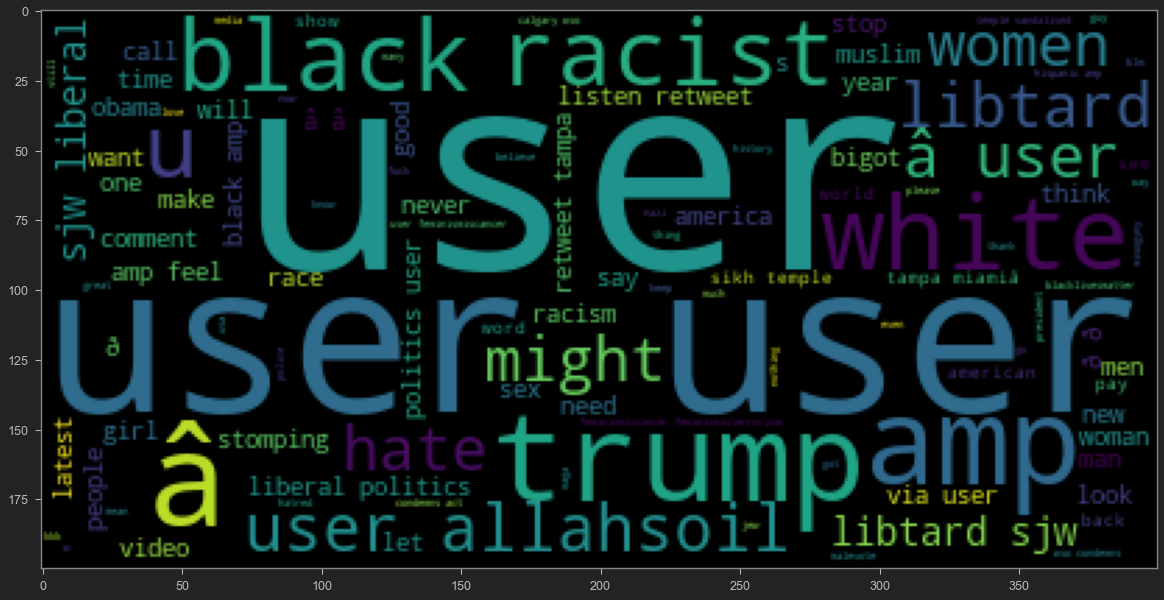

In [48]:
# Visualization for negative words 
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string))

#  PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [49]:
import string
string.punctuation # punctiution which we want to remove 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [53]:
test_punc_removed = [char for char in Test if char not in string.punctuation ] 
# test_punc_removed

In [58]:
# Join the characters again to form the string.
test_punc_removed_join = ''.join(test_punc_removed)
test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

In [55]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
test_punc_removed_join_clean = [word  for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]

In [60]:
test_punc_removed_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [ ]:
Test_punc_removed_join_clean # Only important (no so common) words are left

In [62]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [70]:
# remove punctuations
removed_punc = [ char for char in mini_challenge if char not in string.punctuation ]
removed_punc_join = ''.join(removed_punc)
removed_punc_join

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [72]:
# remove stop words 
removed_stop_words = [ word for word in removed_punc_join.split() if word.lower() not in stopwords.words('english') ]
removed_stop_words  # Great 

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

# PERFORM COUNT VECTORIZATION (TOKENIZATION)
# Documnted Matrix

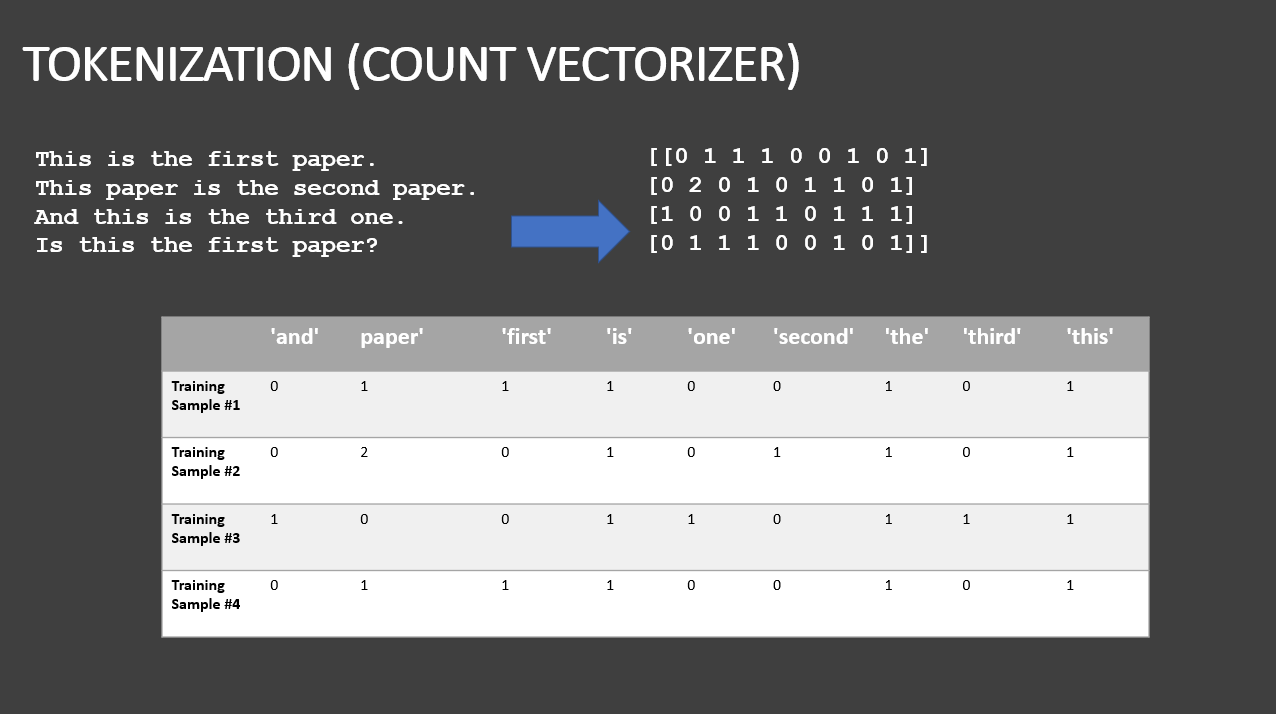

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third  one.','Is this the first paper?']

vectroizer = CountVectorizer()
X = vectroizer.fit_transform(sample_data)

In [89]:
print(vectroizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [90]:
X.toarray()

array([[0, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 2, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 1]], dtype=int64)

# CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [91]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [92]:
# apply message cleaning function 
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [97]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [98]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [103]:
from sklearn.feature_extraction.text import CountVectorizer
# add analyzer before vectorization .. 1- Clean message first , 2- apply Vectorization 
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype='uint8')

tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet']).toarray()

In [104]:
print(vectorizer.get_feature_names())


['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [105]:
tweets_countvectorizer.shape

(31962, 47386)

In [106]:
X = tweets_countvectorizer


In [107]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [108]:
y = tweets_df['label']

# TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [109]:
X.shape

(31962, 47386)

In [110]:
y.shape

(31962,)

In [111]:
# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

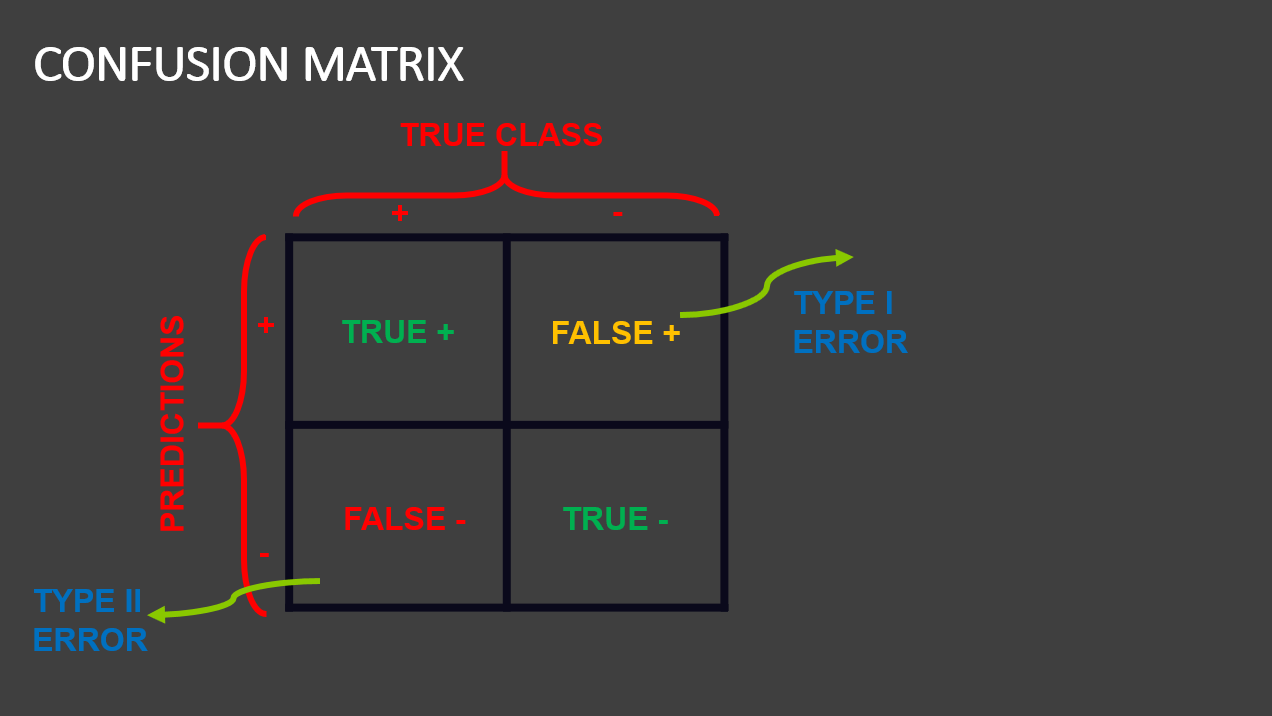

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [119]:
# Predicting the Test set results
y_predict = NB_classifier.predict(X_test)


array([[5763,  149],
       [ 225,  256]], dtype=int64)

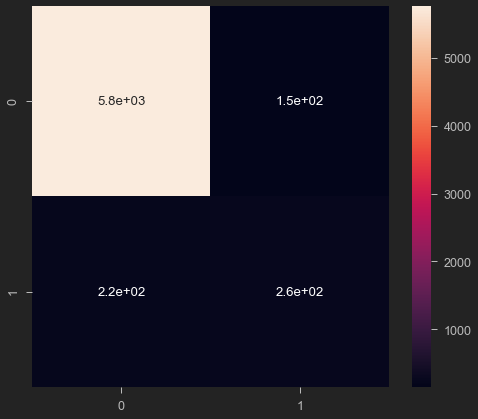

In [120]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
cm

In [125]:
# Accuracy score
print("NB_classifier",":",accuracy_score(y_test,y_predict)*100)

NB_classifier : 94.14985139996872


In [126]:
# Try different classifiers 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVM =SVC()

In [135]:
SVM.fit(X_train, y_train)

MemoryError: Unable to allocate 9.03 GiB for an array with shape (25569, 47386) and data type float64